In [4]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
from metpy.units import units
from metpy.calc import moist_lapse, dry_lapse
import numpy as np

In [6]:
exp_name = f'aquaplanet/d5_more_output'
dataset = isca_tools.load_dataset(exp_name)

In [23]:
def plot_lapse_rate(d, ax, time=None, lat_min=-90, lat_max=90, lon_min=0, lon_max=360, show_dry=False, show_moist=False):
    if time is None:
        time = dataset.temp.time[-1]            # use final time if not given
    d_use = d.temp.where(d.temp.time == time, drop=True)

    # Only use location specified by latitude and longitude
    d_use = d_use.where((d_use.lat <= lat_max) & (d_use.lat >= lat_min), drop=True)
    d_use = d_use.where((d_use.lon <= lon_max) & (d_use.lon >= lon_min), drop=True)

    d_use = d_use.mean(dim=['lat', 'lon'])      # Take mean of selected location
    d_use.plot.line(ax=ax, y='pfull', yincrease=False, add_legend=False, label=f"Day = {int(d_use.time.values[0])}")
    p_levs = d_use.pfull.to_numpy()[::-1]
    temp_ref = d_use.to_numpy()[-1, -1]
    if show_dry:
        # Show dry adiabat
        temp_dry = np.asarray(dry_lapse(p_levs * units.hPa, temp_ref * units.kelvin))
        ax.plot(temp_dry, p_levs, label='Dry Adiabat')
    if show_moist:
        # Show moist adiabat
        temp_moist = np.asarray(moist_lapse(p_levs * units.hPa, temp_ref * units.kelvin))
        ax.plot(temp_moist, p_levs, label='Moist Adiabat')
    ax.legend()
    ax.set_title(f'Temperature Profile, ({int(lat_min)}$< \phi<${int(lat_max)}, {int(lon_min)}$< \lambda<${int(lon_max)})')

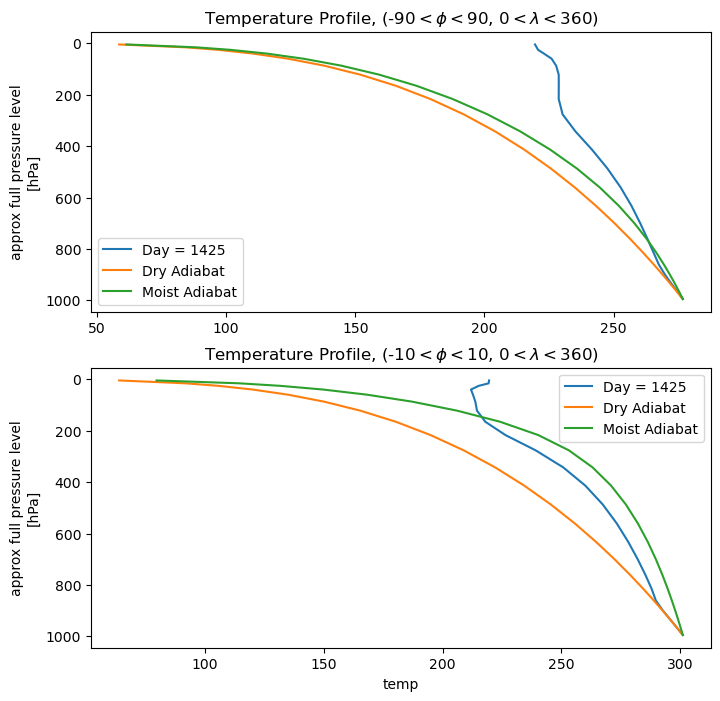

In [28]:
fig, ax = plt.subplots(2,1, figsize=(8, 8))
plot_lapse_rate(dataset, ax[0], show_dry=True, show_moist=True)
plot_lapse_rate(dataset, ax[1], show_dry=True, show_moist=True, lat_min=-10, lat_max=10)
ax[0].set_xlabel('');

The 2nd plot above for the tropics shows that the lapse rate follows the dry adiabat up to about $800hPa$ (the lifting condensation level) and then follows the moist adiabat. I.e. it is convectively neutral.

The 1st plot shows the globally averaged lapse rate and the lapse rate is also similar to the dry adiabat very near the surface, but then it decreases with altitude implying convection is not dominant.